In [1]:
%matplotlib inline

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn.preprocessing as sp
from scipy import stats

In [3]:
Dataset = np.load('Dataset.npy')

In [4]:
Dataset = np.random.permutation(Dataset)

X_train = Dataset[:8110,:9]
Y_train = Dataset[:8110,-3:]
X_test  = Dataset[8110:,:9]
Y_test  = Dataset[8110:,-3:]

def Standardization(Data):
    scaler = sp.StandardScaler().fit(Data)
    scl = scaler.transform(Data)
    return scl , scaler

X_train_scl = Standardization(X_train)[0]
X_test_scl = Standardization(X_test)[0]
Y_train_scl = Standardization(Y_train)[0]
Y_test_scl = Standardization(Y_test)[0]

np.save('X_train.npy' , X_train)
np.save('X_train_scl.npy' , X_train_scl)

In [5]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units = 16 , activation = 'relu' , input_dim = 9) ,
        tf.keras.layers.Dense(units = 16 , activation = 'relu'),
        tf.keras.layers.Dense(units = 16 , activation = 'relu'),
        tf.keras.layers.Dense(units = 16 , activation = 'relu'),
        tf.keras.layers.Dense(units = 16 , activation = 'relu'),
        tf.keras.layers.Dense(units = 3                       )
         ])

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              loss = 'mae',
              metrics = ['accuracy','mae'])
model.summary()
history = model.fit(X_train_scl , Y_train_scl , epochs = 1000 , batch_size = 800 , validation_split = 0.2 , verbose = 0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 1,299
Trainable params: 1,299
Non-trainable params: 0
______________________________________________________

In [6]:
score = model.evaluate(X_test_scl , Y_test_scl , batch_size = 800 , verbose = 0)
print('score:',score)
print('Accuracy:',score[1]*100,'%')

score: [0.027154600556344676, 0.9837278, 0.027154598]
Accuracy: 98.37278127670288 %


In [7]:
model.save('Final_model.h5')

In [8]:
X_train_stdev = Standardization(X_train)[1].scale_
X_train_mean  = Standardization(X_train)[1].mean_
Y_train_stdev = Standardization(Y_train)[1].scale_
Y_train_mean  = Standardization(Y_train)[1].mean_

np.save('X_train_stdev.npy' , X_train_stdev)
np.save('X_train_mean.npy' , X_train_mean)
np.save('Y_train_stdev.npy' , Y_train_stdev)
np.save('Y_train_mean.npy' , Y_train_mean)

Y_predict_scl = model.predict(X_test_scl)
Y_predict = Y_predict_scl * Y_train_stdev + Y_train_mean

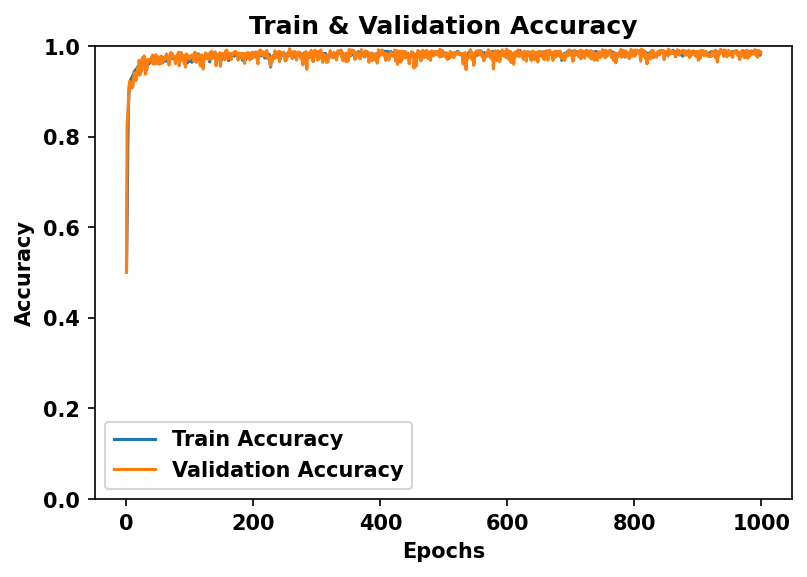

In [30]:
plt.figure(dpi = 150)
plt.ylim(0,1)
plt.title('Train & Validation Accuracy' , fontweight = 'bold')
plt.plot(history.history['accuracy'],label = 'Train Accuracy' , linewidth = 1.5)
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy' , linewidth = 1.5)
plt.xlabel('Epochs' , fontweight = 'bold')
plt.ylabel('Accuracy' , fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(prop = {'weight':'bold'})
plt.savefig('Accuracy.png', dpi = 150)

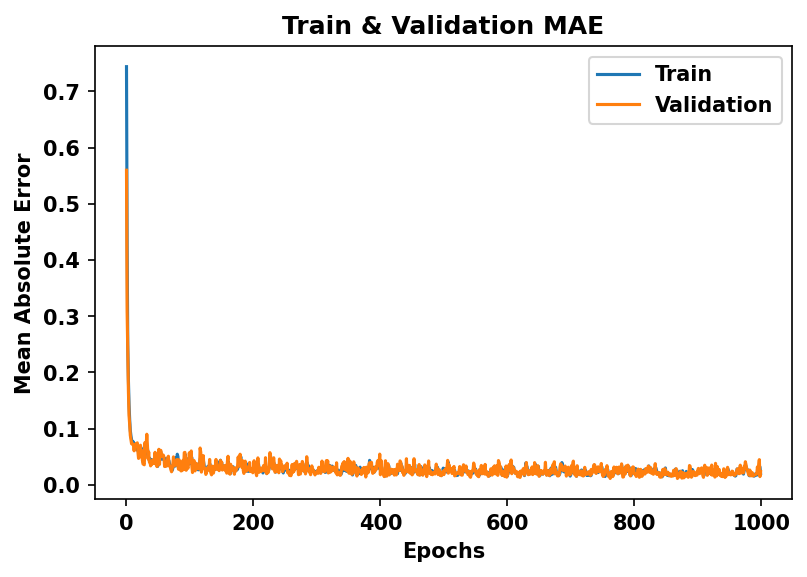

In [31]:
plt.figure(dpi = 150)
plt.title('Train & Validation MAE' , fontweight = 'bold')
plt.plot(history.history['mae'],label = 'Train' , linewidth = 1.5)
plt.plot(history.history['val_mae'],label = 'Validation' , linewidth = 1.5)
plt.xlabel('Epochs' , fontweight = 'bold')
plt.ylabel('Mean Absolute Error' , fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.legend(prop = {'weight':'bold'})
plt.savefig('MAE', dpi = 150)

R_Pearson =  0.9999333121627969


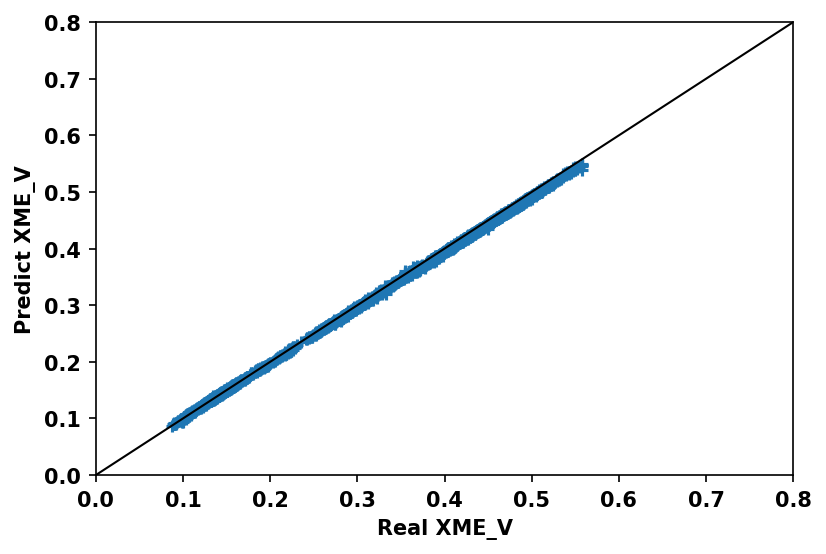

In [11]:
Y_test_reshape = np.reshape(Y_test[:,0],(2028,))
Y_predict_reshape = np.reshape(Y_predict[:,0],(2028,))
R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

min = 0.0
max = 0.8
plt.figure(dpi = 150)
plt.xlim(min,max)
plt.ylim(min,max)
plt.scatter(Y_test[:,0],Y_predict[:,0],marker = '+')
plt.plot([min,max],[min,max],'black',linewidth = 1)
plt.xlabel('Real XME_V' , fontweight = 'bold')
plt.ylabel('Predict XME_V' , fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.savefig('XME_V.png', dpi = 150)

R_Pearson =  0.9996660670782695


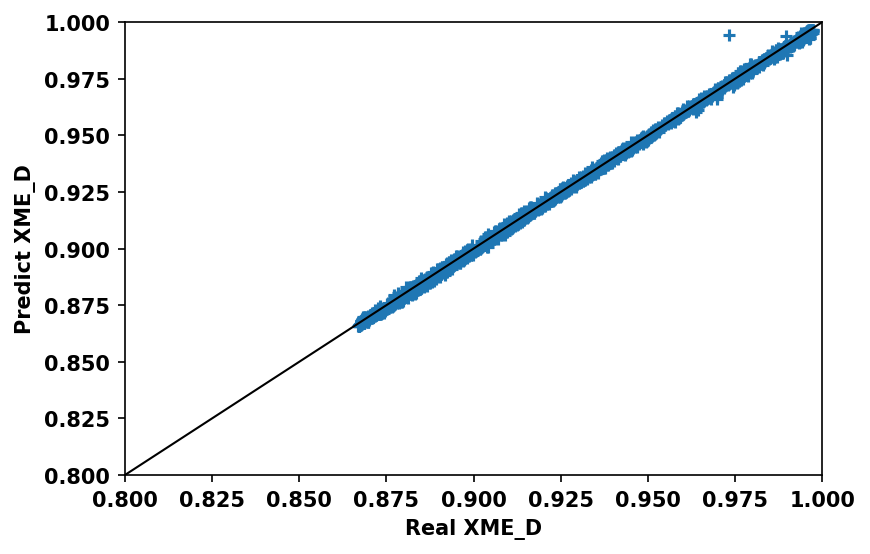

In [12]:
Y_test_reshape = np.reshape(Y_test[:,1],(2028,))
Y_predict_reshape = np.reshape(Y_predict[:,1],(2028,))
R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

min = 0.8
max = 1.0
plt.figure(dpi = 150)
plt.xlim(min,max)
plt.ylim(min,max)
plt.scatter(Y_test[:,1],Y_predict[:,1],marker = '+')
plt.plot([min,max],[min,max],'black',linewidth = 1)
plt.xlabel('Real XME_D' , fontweight = 'bold')
plt.ylabel('Predict XME_D' , fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.savefig('XME_D.png', dpi = 150)

R_Pearson =  0.9996134130659029


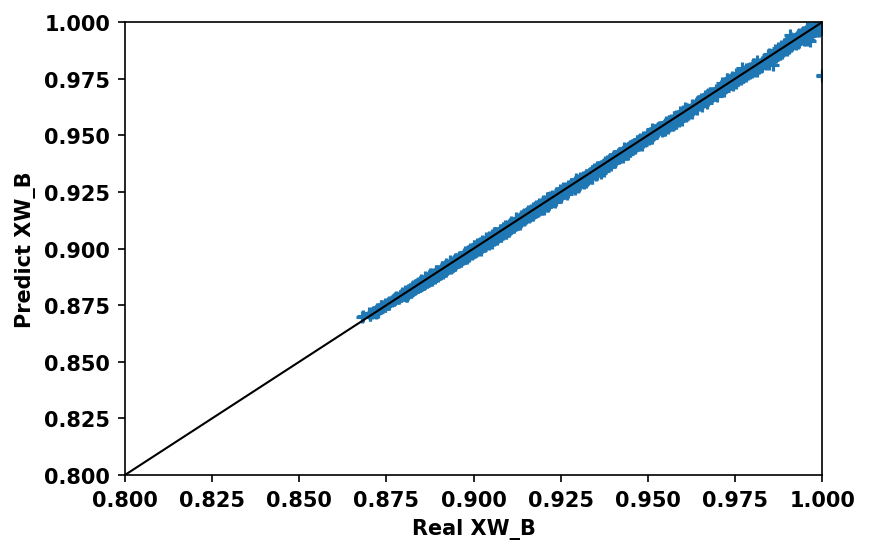

In [13]:
Y_test_reshape = np.reshape(Y_test[:,2],(2028,))
Y_predict_reshape = np.reshape(Y_predict[:,2],(2028,))
R_Pearson = stats.pearsonr(Y_test_reshape , Y_predict_reshape)
print('R_Pearson = ', R_Pearson[0])

min = 0.8
max = 1.0
plt.figure(dpi = 150)
plt.xlim(min,max)
plt.ylim(min,max)
plt.scatter(Y_test[:,2],Y_predict[:,2],marker = '+')
plt.plot([min,max],[min,max],'black',linewidth = 1)
plt.xlabel('Real XW_B' , fontweight = 'bold')
plt.ylabel('Predict XW_B' , fontweight = 'bold')
plt.xticks(fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.savefig('XW_B.png', dpi = 150)

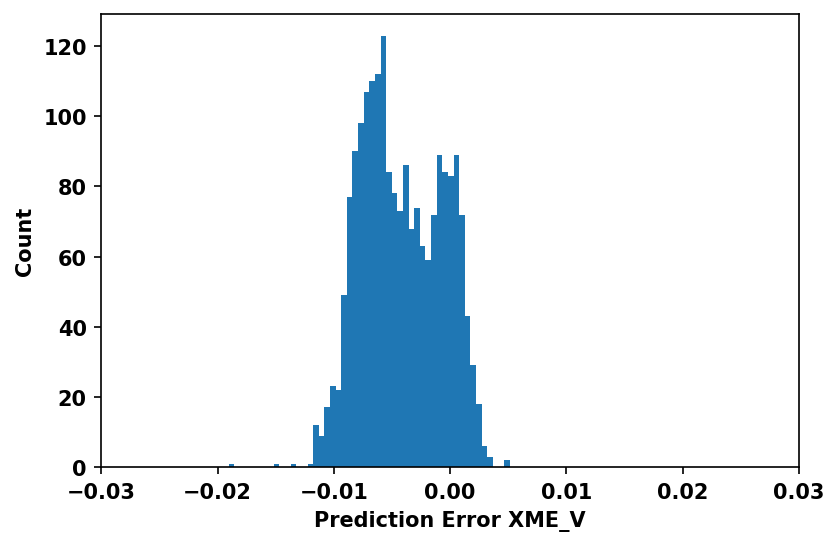

In [23]:
axis = 0.03
error = (Y_predict[:,0] - Y_test[:,0])
plt.figure(dpi = 150)
plt.hist(error, bins = 50)
plt.xlabel('Prediction Error XME_V' , fontweight = 'bold')
plt.ylabel('Count' , fontweight = 'bold')
plt.xticks(np.linspace(-axis , axis , 7) , fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xlim(-axis,axis)
plt.savefig('Error XME_V.png', dpi = 150)

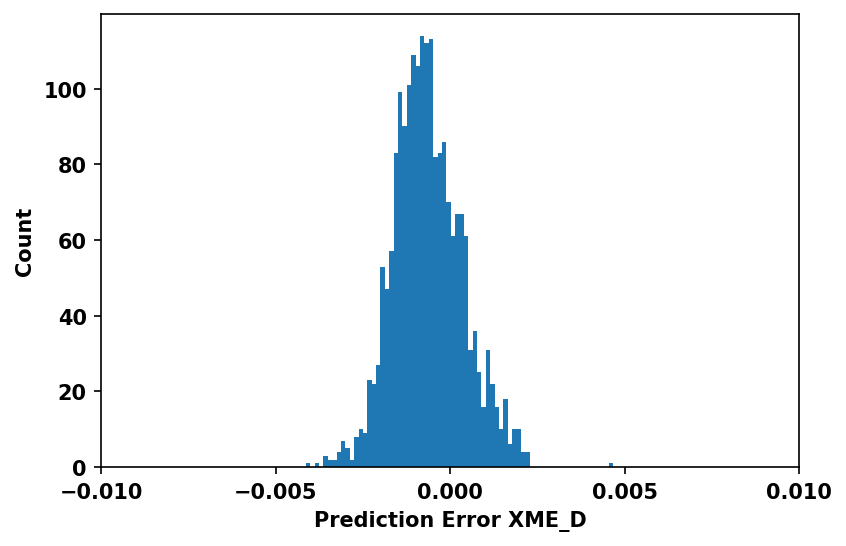

In [24]:
axis = 0.01
error = (Y_predict[:,1] - Y_test[:,1])
plt.figure(dpi = 150)
plt.hist(error , bins = 200)
plt.xlabel('Prediction Error XME_D' , fontweight = 'bold')
plt.ylabel('Count' , fontweight = 'bold')
plt.xticks(np.linspace(-axis , axis , 5) , fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xlim(-axis,axis)
plt.savefig('Error XME_D.png', dpi = 150)

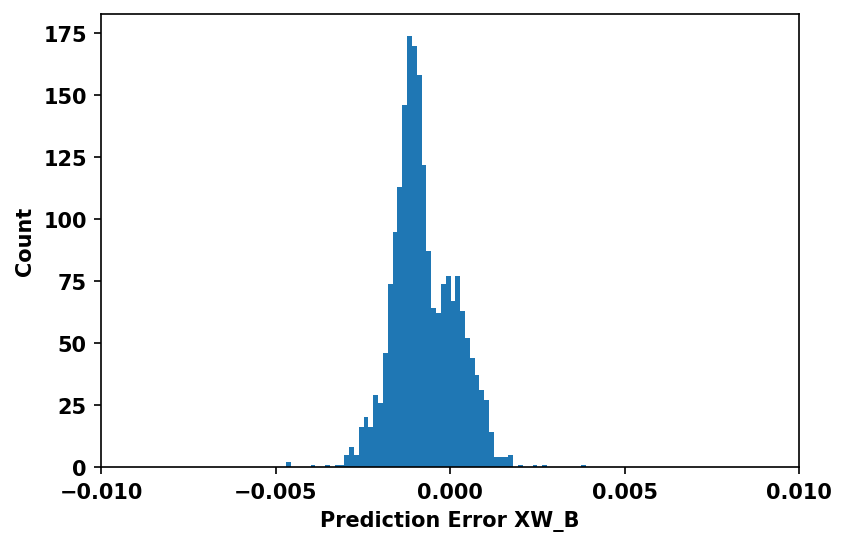

In [29]:
axis = 0.01
error = (Y_predict[:,2] - Y_test[:,2])
plt.figure(dpi = 150)
plt.hist(error , bins = 200)
plt.xlabel('Prediction Error XW_B' , fontweight = 'bold')
plt.ylabel('Count' , fontweight = 'bold')
plt.xticks(np.linspace(-axis , axis , 5) , fontweight = 'bold')
plt.yticks(fontweight = 'bold')
plt.xlim(-axis,axis)
plt.savefig('Error XW_B.png', dpi = 150)

In [17]:
'''
Tin = input('Tin = ')
FR = input('FR = ')
T1 = input('T1 = ')
T2 = input('T2 = ')
Qcool = input('Qcool = ')
RR = input('RR = ')
B = input('B = ')
QR = input('QR')
Qc = input('Qc')
X_real = np.array([Tin , FR , T1 , T2 , Qcool , RR , B , QR , Qc])
X_train = np.vstack([X_train,X_real])

scaler_X_train = sp.StandardScaler().fit(X_train)
X_train_scl = scaler_X_train.transform(X_train)

Y_predict_scl = model.predict(X_train_scl)
Y_predict = Y_predict_scl * scaler_Y_train.scale_ + scaler_Y_train.mean_

X_real = X_train[-1,:]
Y_real = Y_predict[-1,:]
print(X_real)
print(Y_real)
'''

"\nTin = input('Tin = ')\nFR = input('FR = ')\nT1 = input('T1 = ')\nT2 = input('T2 = ')\nQcool = input('Qcool = ')\nRR = input('RR = ')\nB = input('B = ')\nQR = input('QR')\nQc = input('Qc')\nX_real = np.array([Tin , FR , T1 , T2 , Qcool , RR , B , QR , Qc])\nX_train = np.vstack([X_train,X_real])\n\nscaler_X_train = sp.StandardScaler().fit(X_train)\nX_train_scl = scaler_X_train.transform(X_train)\n\nY_predict_scl = model.predict(X_train_scl)\nY_predict = Y_predict_scl * scaler_Y_train.scale_ + scaler_Y_train.mean_\n\nX_real = X_train[-1,:]\nY_real = Y_predict[-1,:]\nprint(X_real)\nprint(Y_real)\n"